In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Arial')
gtfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/finalize/finalize2/BL22Testmixture_outputgt_fract.txt_ctrename.txt'
tprFPR='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/finalize/finalize2/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_optCutpoint_TPR_FPR.txt_ctrename.txt'

gtdf=pd.read_csv(gtfile,sep='\t',index_col=0)
tprFPRdf=pd.read_csv(tprFPR,sep='\t',index_col=0)
tprFPRdf.reset_index(inplace=True)
gtdf.head()


,Naive CD4 T,Naive CD8 T,Naive B,NK,PC,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,...,CD8 TCM,CD8 TEM,Eosinophil,Tregs,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix1,0.001567,0.008916,0.089903,0.061825,0.050337,0.098178,0.096435,0.015229,0.020884,0.038765,...,0.034814,0.097541,0.051067,0.009634,0.081890,0.036467,0.030411,0.012113,0.001277,0.052114
BL22test_NR_3215798_insilmix2,0.019763,0.067135,0.078821,0.008333,0.086130,0.032387,0.090040,0.081458,0.030769,0.040650,...,0.025479,0.094256,0.098377,0.016312,0.006932,0.002470,0.070859,0.007504,0.001665,0.039045
BL22test_NR_3215798_insilmix3,0.016832,0.063332,0.027583,0.030681,0.036016,0.021821,0.000066,0.057864,0.008802,0.081407,...,0.002127,0.063747,0.016275,0.069077,0.061973,0.081773,0.069628,0.080661,0.017842,0.086525
BL22test_NR_3215798_insilmix4,0.025658,0.077149,0.025406,0.039902,0.070235,0.057107,0.062788,0.064365,0.044093,0.019512,...,0.058935,0.021134,0.031924,0.026297,0.066437,0.079915,0.069884,0.085429,0.022945,0.014311
BL22test_NR_3215798_insilmix5,0.075323,0.052262,0.046414,0.054890,0.061212,0.003146,0.014326,0.085246,0.012295,0.103779,...,0.018251,0.014336,0.029931,0.055539,0.031640,0.095913,0.002125,0.075938,0.092160,0.023713


In [2]:
tprFPRdf.head()

,celltype,TPR,FPR
0,Eosinophil,1.000000,0.040657
1,Erythroblast,0.977941,0.037611
2,Macrophage (M0),0.911765,0.179619
3,Macrophage (M1),0.850000,0.140075
4,Macrophage (M2),0.940828,0.147554


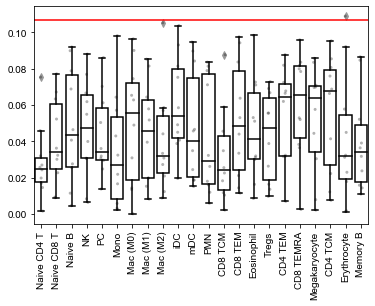

In [3]:

#gtdf =gtdf.sort_index(axis=1)

tprFPRdfmean=tprFPRdf.mean()

ax=sns.boxplot(data=gtdf,color='white')
ax=sns.stripplot(color = 'black',data = gtdf,alpha = 0.3,size =3)
plt.axhline(y=tprFPRdfmean['FPR'],color='red')
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.savefig(gtfile+'.pdf', bbox_inches='tight')

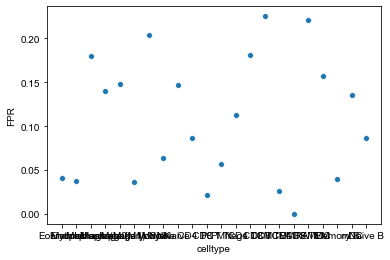

In [4]:
sns.scatterplot(data=tprFPRdf, x="celltype", y="FPR")

(0.0, 0.25)

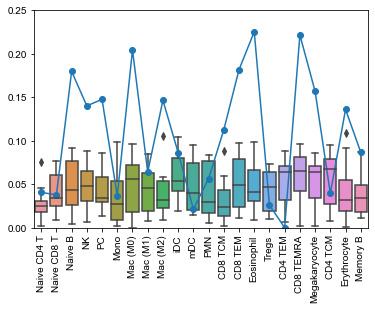

In [5]:
fig, ax = plt.subplots()
sns.boxplot(data=gtdf,ax=ax)
#sns.scatterplot(data=tprFPRdf, x="celltype", y="FPR", ax=ax)
plt.plot("celltype", "FPR", data=tprFPRdf, linestyle='-', marker='o')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0,.25])

In [6]:
tprFPRdfmean=tprFPRdf.mean()

In [7]:
tprFPRdfmean['FPR']

0.10667398919906614

In [8]:
tprFPRdfmedian=tprFPRdf.median()
tprFPRdfmedian['FPR']

0.09959500875656743

[Text(0, 0, 'Naive CD4 T'),
 Text(0, 0, 'Naive CD8 T'),
 Text(0, 0, 'Naive B'),
 Text(0, 0, 'NK'),
 Text(0, 0, 'PC'),
 Text(0, 0, 'Mono'),
 Text(0, 0, 'Mac (M0)'),
 Text(0, 0, 'Mac (M1)'),
 Text(0, 0, 'Mac (M2)'),
 Text(0, 0, 'iDC'),
 Text(0, 0, 'mDC'),
 Text(0, 0, 'PMN'),
 Text(0, 0, 'CD8 TCM'),
 Text(0, 0, 'CD8 TEM'),
 Text(0, 0, 'Eosinophil'),
 Text(0, 0, 'Tregs'),
 Text(0, 0, 'CD4 TEM'),
 Text(0, 0, 'CD8 TEMRA'),
 Text(0, 0, 'Megakaryocyte'),
 Text(0, 0, 'CD4 TCM'),
 Text(0, 0, 'Erythrocyte'),
 Text(0, 0, 'Memory B')]

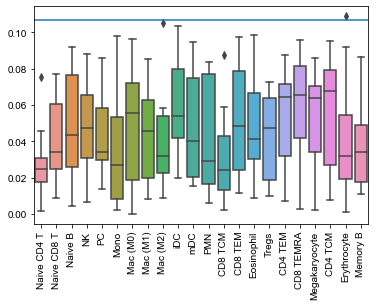

In [9]:
fig, ax = plt.subplots()
sns.boxplot(data=gtdf,ax=ax)
#sns.scatterplot(data=tprFPRdf, x="celltype", y="FPR", ax=ax)
plt.axhline(y=tprFPRdfmean['FPR'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [10]:
theoriticalfdr='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/finalize/finalize2/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_theoriticalFDR.txt_ctrename.txt'
theoriticalfdrDF=pd.read_csv(theoriticalfdr,sep='\t',index_col=0)
theoriticalfdrDF.head()

,Naive CD4 T,Naive CD8 T,Naive B,NK,PC,Mono,Mac (M0),Mac (M1),Mac (M2),iDC,...,CD8 TCM,CD8 TEM,Eosinophil,Tregs,CD4 TEM,CD8 TEMRA,Megakaryocyte,CD4 TCM,Erythrocyte,Memory B
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,0.791439,0.784977,0.917918,0.892480,0.616768,0.763596,0.748548,0.916952,0.778355,0.668547,...,0.956676,0.796524,0.402540,0.804162,0.0,0.318584,0.532693,0.587268,0.364019,0.747863
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,1.000000,0.916332,0.377657,0.520839,0.507980,0.660581,0.692154,0.919164,0.870428,0.856321,...,0.956249,0.520554,0.448473,1.000000,0.0,0.336207,0.718905,1.000000,1.000000,0.558603
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,0.917940,0.682900,0.409514,0.863712,0.292653,0.861297,0.705039,0.655484,0.849534,0.858326,...,1.000000,0.504771,0.218457,1.000000,0.0,1.000000,0.502089,1.000000,1.000000,0.606667
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,0.916583,0.716787,0.779025,0.655924,0.517590,0.924909,1.000000,0.708904,0.943260,0.649292,...,1.000000,0.617498,0.834479,0.611650,0.0,0.193717,0.524575,0.620464,0.514512,0.349743
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,0.860256,0.667368,0.765551,0.624664,0.375485,0.777281,0.771006,0.665999,0.797801,0.871952,...,0.918475,0.838895,0.589586,0.891452,0.0,0.230000,0.516171,0.587268,0.519496,1.000000


In [11]:
theoriticalfdrDFmean=theoriticalfdrDF.mean(axis=0)
theoriticalfdrDFmean.head()

Naive CD4 T    0.869097
Naive CD8 T    0.775657
Naive B        0.618232
NK             0.616688
PC             0.565742
dtype: float64

In [12]:
theoriticalfdrDFmeandf=theoriticalfdrDFmean.to_frame()
theoriticalfdrDFmeandf.reset_index(inplace=True)
theoriticalfdrDFmeandf.to_csv(theoriticalfdr+"_mean.txt",sep='\t',index=False)
theoriticalfdrDFmeandf.head()

,index,0
0,Naive CD4 T,0.869097
1,Naive CD8 T,0.775657
2,Naive B,0.618232
3,NK,0.616688
4,PC,0.565742


In [13]:
theoriticalfdrDFmeandfagain =pd.read_csv('/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/finalize/finalize2/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_theoriticalFDR.txt_ctrename.txt_mean.txt',sep='\t')
theoriticalfdrDFmeandfagain.head()

,index,0
0,Naive CD4 T,0.869097
1,Naive CD8 T,0.775657
2,Naive B,0.618232
3,NK,0.616688
4,PC,0.565742


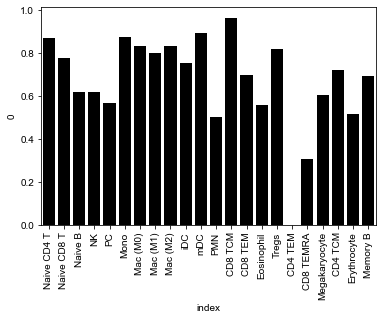

In [18]:
#theoriticalfdrDFmeandfagain =pd.read_csv('/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/finalize/finalize2/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl_theoriticalFDR.txt_ctrename.txt_mean.txt',sep='\t')

ax = sns.barplot(x="index", y=0, data=theoriticalfdrDFmeandf,color='k')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig(gtfile+'_FDR.pdf', bbox_inches='tight')

[Text(0, 0, 'Naive CD4 T'),
 Text(0, 0, 'Naive CD8 T'),
 Text(0, 0, 'Naive B'),
 Text(0, 0, 'NK'),
 Text(0, 0, 'PC'),
 Text(0, 0, 'Mono'),
 Text(0, 0, 'Mac (M0)'),
 Text(0, 0, 'Mac (M1)'),
 Text(0, 0, 'Mac (M2)'),
 Text(0, 0, 'iDC'),
 Text(0, 0, 'mDC'),
 Text(0, 0, 'PMN'),
 Text(0, 0, 'CD8 TCM'),
 Text(0, 0, 'CD8 TEM'),
 Text(0, 0, 'Eosinophil'),
 Text(0, 0, 'Tregs'),
 Text(0, 0, 'CD4 TEM'),
 Text(0, 0, 'CD8 TEMRA'),
 Text(0, 0, 'Megakaryocyte'),
 Text(0, 0, 'CD4 TCM'),
 Text(0, 0, 'Erythrocyte'),
 Text(0, 0, 'Memory B')]

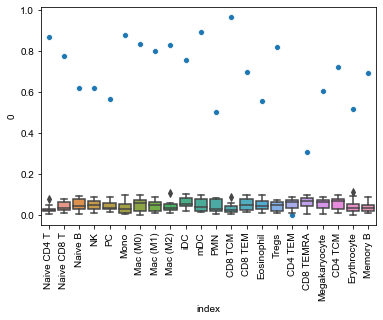

In [15]:
fig, ax = plt.subplots()
sns.boxplot(data=gtdf,ax=ax)
sns.scatterplot(data=theoriticalfdrDFmeandf, x="index", y=0, ax=ax)
#plt.axhline(y=tprFPRdfmean['FPR'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [16]:

gtdfmean=gtdf.mean()
gtdfmeandf=gtdfmean.to_frame()
gtdfmeandf.to_csv(gtfile+"_mean.txt",sep='\t')
gtdfmeandf.head()

,0
Naive CD4 T,0.028272
Naive CD8 T,0.039934
Naive B,0.048547
NK,0.046403
PC,0.043450
